## Desafio  - Regresión desde la econometría
## Jose Gomez
## Lunes 01-06-2020

Credits.csv
<br>__Income__ : Ingreso anual disponible en miles de dólares.
<br>__Limit__ : Límite del crédito.
<br>__Rating__ : Ranking del crédito.
<br>__Cards__ : Cantidad de tarjetas de credito.
<br>__Age__ : Edad del usuario.
<br>__Education__ : Años de educación del usuario.
<br>__Gender__ : ¿Hombre o mujer?
<br>__Student__ : ¿Es estudiante?
<br>__Married__ : ¿Está casado?
<br>__Ethnicity__ : Etnicidad del usuario (Caucásico, Afroamericano, Asiático)
<br>__Balance__ : Promedio de deuda en tarjeta de crédito de usuario.

<br>Para efectos prácticos del desafío, nos interesa saber sobre los determinantes de la variación en el
promedio de deuda en tarjeta de crédito.
<br>A lo largo del desafío generaremos modelos econométricos para inspeccionar los efectos de
distintos atributos.

## Desafío 1: Prepare el ambiente de trabajo

In [54]:
import numpy as np
import pandas as pd
import statsmodels

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('Credit.csv').drop(columns=['Unnamed: 0'])

Siguiendo las buenas prácticas, genere variables binarias para capturar el efecto del grupo
minoritario en cada variable. 
   >ip: Utilice value_counts() para revisar la cantidad de casos en las variables
categóricas.

In [49]:
for col in df.columns:
    #print(col,"-> "+ str(df[col].dtypes))
    if df[col].dtypes == 'object':
        print(df[col].value_counts())
        print()

Female    207
 Male     193
Name: Gender, dtype: int64

No     360
Yes     40
Name: Student, dtype: int64

Yes    245
No     155
Name: Married, dtype: int64

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64



#### Para el caso de Ethnicity , genere binarias para AfricanAmerican y Asian .

In [52]:
pd.get_dummies(df, columns=['Ethnicity'])['Ethnicity_African American'].value_counts()

0    301
1     99
Name: Ethnicity_African American, dtype: int64

In [53]:
pd.get_dummies(df, columns=['Ethnicity'])['Ethnicity_Asian'].value_counts()

0    298
1    102
Name: Ethnicity_Asian, dtype: int64

## Desafío 2: Genere gráficos descriptivos para las variables contínuas
Genere una función llamada plot_hist que genere un __histograma__ de la variable e indique la
__media__ y __mediana__ de la misma. Agrege una legenda para indicar qué representa cada línea.
<br>¿Cuál es el comportamiento de Balance , Income , Cards y Rating ?

In [33]:
def plot_hist(data, var):
    sns.distplot(data[var])
    plt.title('Histograma para: {}'.format(var))
    min_ylim, max_ylim = plt.ylim()

    plt.axvline(data[var].mean(), ls='--', c='red')
    plt.text(data[var].mean()*1.1, max_ylim*0.9, 'Media: {:.2f}'.format(data[var].mean()))

    plt.axvline(data[var].mean(), ls='--', c='blue')    
    plt.text(data[var].median()*1.1, max_ylim*0.5, 'Mediana: {:.2f}'.format(data[var].median()))
    plt.show()

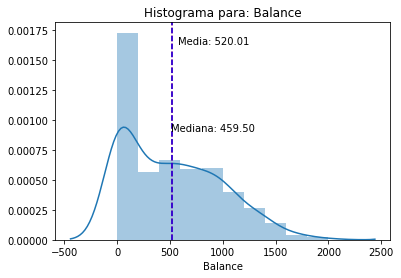

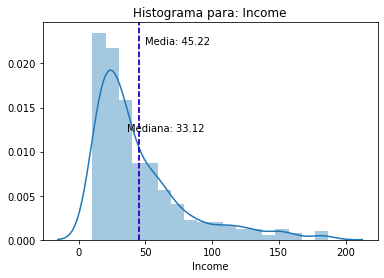

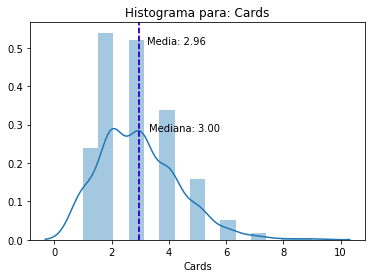

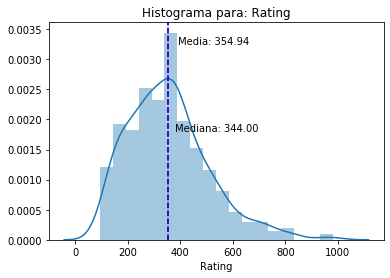

In [34]:
for var in ['Balance','Income','Cards','Rating']:
    plot_hist(df, var)

<div class="alert alert-block alert-warning">
<b>Comentario:</b>
<br>Todas las variables poseen valores de Media y Mediana relativamente cercanas. Sus comportamientos de distribución son <b>asimétricas positivas</b>.
<br><b>Cards</b> es unimodal a diferencia del resto

</div>

## Desafío 3: Regresión Lineal Simple

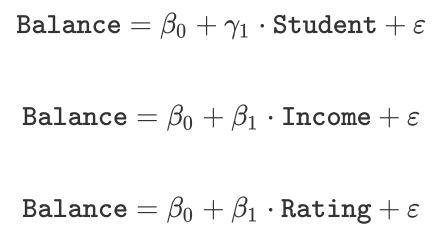

Utilizando statsmodels , comente brevemente los siguientes puntos:
1. ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?
2. ¿Qué podemos decir sobre el comportamiento de Student ?
3. ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?

### Modelo Student

In [73]:
df['Student'].value_counts()

No     360
Yes     40
Name: Student, dtype: int64

In [63]:
var_student = df[['Balance', 'Student']]

In [65]:
var_student['bin_student'] = np.where(var_student['Student'] == 'Yes', 1,0)

/Users/josebookpro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
var_student = var_student.drop('Student', axis=1)

In [84]:
# modelo STUDENT
model_student = smf.ols('Balance ~ bin_student', data = var_student).fit()
model_student.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.49e-07
Time:                        21:55:26   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
bin_student   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



<div class="alert alert-block alert-warning">
<b>2. ¿Qué podemos decir sobre el comportamiento de Student ?</b>
<br> Tiene un desvalance de clases
</div>

In [75]:
import scipy.stats as stats
stats.ttest_ind(df[df['Student'] == 'Yes']['Balance'], df[df['Student'] == 'No']['Balance'])

Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)

In [83]:
print("Student - Yes: {:.2f}".format(df[df['Student'] == 'Yes']['Balance'].mean()) )
print("Student - No: {:.2f}".format(df[df['Student'] == 'No']['Balance'].mean()) )


Student - Yes: 876.83
Student - No: 480.37


<div class="alert alert-block alert-warning">
<b>3. ¿Qué pasa si aplicamos una prueba de hipótesis para muestras independientes de Balance entre aquellos que son y no son estudiantes?</b>
<br> La diferencia es significativa al 95%. Donde para los estudiantes la media es 877 y los no estudiantes 480
</div>

### Modelo Income

In [87]:
df.Income.dtypes

dtype('float64')

In [88]:
var_income = df[['Balance', 'Income']]

In [89]:
# modelo INCOME
model_income = smf.ols('Balance ~ Income', data = var_income).fit()
model_income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.03e-22
Time:                        21:59:44   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Modelo Rating

In [90]:
var_rating = df[['Balance', 'Rating']]

# modelo RATING
model_rating = smf.ols('Balance ~ Rating', data = var_rating).fit()
model_rating.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          1.90e-120
Time:                        22:00:49   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<div class="alert alert-block alert-warning">
<b>1. ¿Qué variable presenta un mayor poder explicativo de la variabilidad de Balance ?</b>
<br> <b>Rating</b> explica un 75% de la variabilidad de Balance
</div>

## Desafío 4: Genere un modelo que incluya todos los regresores
Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.

In [91]:
for col in df.columns:
    print(col,"-> "+ str(df[col].dtypes))

Income -> float64
Limit -> int64
Rating -> int64
Cards -> int64
Age -> int64
Education -> int64
Gender -> object
Student -> object
Married -> object
Ethnicity -> object
Balance -> int64


#### Para ahorrar pasos haciendo todo con np.where o dummies, transformo todo a category y aplico "codes"

In [102]:
for j in df.columns:
    if df[j].dtypes == 'object':
        df[j.upper()] = df[j].astype('category')
        df[j.upper()] = df[j.upper()].cat.codes
    else:
        continue

In [108]:
var_all = df.drop(['Gender','Student','Married','Ethnicity'], axis=1)
var_all.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'GENDER', 'STUDENT', 'MARRIED', 'ETHNICITY'],
      dtype='object')

In [109]:
model_all = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + GENDER + STUDENT + MARRIED + ETHNICITY', data = var_all).fit()

In [110]:
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     825.2
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          6.28e-255
Time:                        22:57:33   Log-Likelihood:                -2399.2
No. Observations:                 400   AIC:                             4820.
Df Residuals:                     389   BIC:                             4864.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -473.8556     35.378    -13.394      0.000    -543.413    -404.299
Income        -7.7983      0.234    -33.299      0.000      -8.259      -7.338
Limit          0.1932      0.033      5.908      0.000       0.129       0.257
Rating         1.1004      0.490      2.248      0.025       0.138       2.063
Cards         17.9451      4.336      4.139      0.000       9.421      26.469
Age           -0.6304      0.294     -2.148      0.032      -1.208      -0.053
Education     -1.0820      1.598     -0.677      0.499      -4.224       2.060
GENDER       -10.4153      9.911     -1.051      0.294     -29.902       9.071
STUDENT      426.7273     16.695     25.561      0.000     393.904     459.550
MARRIED       -7.4121     10.303     -0.719      0.472     -27.669      12.845
ETHNICITY      3.9208      6.001      0.653      0.514      -7.877      15.719
==============================================================================
Omnibus:                       34.588   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.332
Skew:                           0.779   Prob(JB):                     1.06e-09
Kurtosis:                       3.232   Cond. No.                     3.79e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br> Todas las variables juntas explican el 96 % de la variabilidad de Balance, siendo Student la que mayor contribucion aporta
</div>

## Desafío 5: Depure el modelo e incluya sólo los predictores significativo
En base al modelo anterior, refactorize e incluya sólo las variables con un nivel de significancia __p-value__<=0.025
<br>Comente brevemente sobre el poder explicativo en la varianza de y las principales características de los predictores.


In [113]:
var_all_2 = var_all.drop(['Age', 'Education', 'GENDER', 'MARRIED', 'ETHNICITY'], axis=1)
var_all_2.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Balance', 'STUDENT'], dtype='object')

In [116]:
model_var_all_2 = smf.ols('Balance ~ Income + Limit + Rating + Cards + + STUDENT', data = var_all_2).fit()
model_var_all_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     1640.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):          3.60e-261
Time:                        23:08:29   Log-Likelihood:                -2402.8
No. Observations:                 400   AIC:                             4818.
Df Residuals:                     394   BIC:                             4842.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -526.1555     19.747    -26.645      0.000    -564.977    -487.334
Income        -7.8749      0.231    -34.024      0.000      -8.330      -7.420
Limit          0.1944      0.033      5.977      0.000       0.130       0.258
Rating         1.0879      0.487      2.234      0.026       0.130       2.045
Cards         17.8517      4.335      4.118      0.000       9.329      26.374
STUDENT      426.8501     16.574     25.754      0.000     394.266     459.435
==============================================================================
Omnibus:                       30.263   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.257
Skew:                           0.722   Prob(JB):                     2.21e-08
Kurtosis:                       3.179   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-warning">
<b> ¿Mejoró o empeoró el modelo con la reducción de regresores?: </b>
<br> Todas las variables juntas explican el 96 % de la variabilidad de Balance, al sacar las variables con p_value menor o igual a 0.025, la eficiencia del modelo se vió disminuida (R2) a 95% solamente.
</div>


## Desafío 6:
Utilizando lmplot de seaborn, inspeccione el comportamiento de los tres principales determinantes.

#### Determinacion de las variables mas importantes para el modelo (Método descrito en los modelos)

In [121]:
# extraemos los nombres de las columnas en la base de datos
columns = var_all_2.columns
# generamos 3 arrays vacíos para guardar los valores # nombre de la variable
attr_name = []
# correlación de pearson
pearson_r = []
# valor absoluto de la correlación 
abs_pearson_r = []

# para cada columna en el array de columnas
for col in columns:
    # si la columna no es la dependiente 
    if col != "Balance":
        # adjuntar el nombre de la variable en attr_name
        attr_name.append(col)
        # adjuntar la correlación de pearson 
        pearson_r.append(var_all_2[col].corr(var_all_2['Balance']))
        # adjuntar el absoluto de la correlación de pearson 
        abs_pearson_r.append(abs(var_all_2[col].corr(var_all_2['Balance'])))
# transformamos los arrays en un DataFrame
features = pd.DataFrame({ 'attribute': attr_name, 'corr':pearson_r, 'abs_corr':abs_pearson_r})
    # generamos el index con los nombres de las variables
features = features.set_index('attribute')
# ordenamos los valores de forma descendiente 
features.sort_values(by=['abs_corr'], ascending=False)


,corr,abs_corr
attribute,,
Rating,0.863625,0.863625
Limit,0.861697,0.861697
Income,0.463656,0.463656
STUDENT,0.259018,0.259018
Cards,0.086456,0.086456


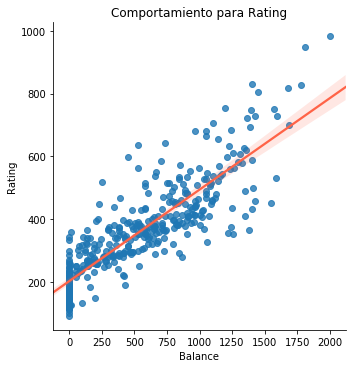

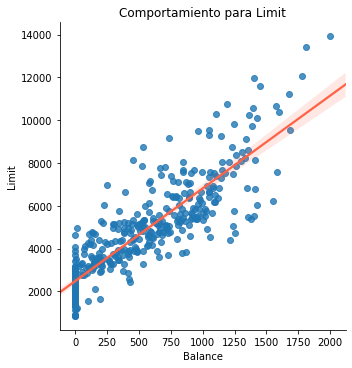

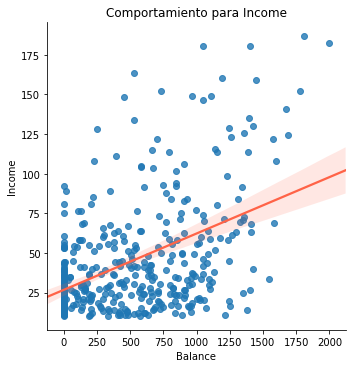

In [124]:
for k in ['Rating', 'Limit', 'Income']:
    sns.lmplot(x="Balance", y=k, data=var_all_2, line_kws={'color':'tomato'})
    plt.title('Comportamiento para {}'.format(k))
    plt.show()

In [ ]:
sns.jointplot(df['Income'], df['Balance'], kind='reg');

<div class="alert alert-block alert-warning">
<b> Comentario: </b>
<br>Las variables más importantes describen positivamente (pendiente de la recta) a Balance
</div>